In [4]:
import os
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# === CONFIG ===
DATA_DIR = r"C:\Users\kuzey\OneDrive\Masaüstü\cografya_proje\Dataset"
BATCH_SIZE = 16
NUM_EPOCHS = 10
NUM_CLASSES = 7
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# === SINCE PREPROCESSING IS DONE ===
# Use minimal transforms (ToTensor + Normalize again just in case)
transform = transforms.Compose([
    transforms.Resize((224, 224)),   # 🔥 FIXED
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


# === LOAD DATASET ===
full_dataset = datasets.ImageFolder(DATA_DIR, transform=transform)
class_names = full_dataset.classes
print("Detected classes:", class_names)

# === SPLIT: 80% train / 20% val ===
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

# === LOAD RESNET18 ===
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, NUM_CLASSES)  # 7 subclasses
model = model.to(DEVICE)

# === LOSS & OPTIMIZER ===
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# === TRAIN LOOP ===
for epoch in range(NUM_EPOCHS):
    model.train()
    running_loss = 0.0
    correct = 0

    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        correct += (outputs.argmax(1) == labels).sum().item()

    train_acc = correct / len(train_dataset)
    print(f"Epoch {epoch+1}: Loss={running_loss:.4f}, Train Acc={train_acc:.4f}")

# === EVALUATE ===
model.eval()
total_correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
        outputs = model(inputs)
        preds = outputs.argmax(1)
        total_correct += (preds == labels).sum().item()
        total += labels.size(0)

val_acc = total_correct / total
print(f"\n✅ Validation Accuracy: {val_acc:.4f}")

# === SAVE THE MODEL ===
save_path = r"C:\Users\kuzey\OneDrive\Masaüstü\cografya_proje\rock_resnet18_subclass.pth"
torch.save(model.state_dict(), save_path)
print(f"\n✅ Model saved to: {save_path}")


Detected classes: ['Basalt', 'Coal', 'Granite', 'Limestone', 'Marble', 'Quartzite', 'Sandstone']


Epoch 1: 100%|███████████████████████████████████████████████████████████████████████| 282/282 [00:19<00:00, 14.44it/s]


Epoch 1: Loss=237.4018, Train Acc=0.7019


Epoch 2: 100%|███████████████████████████████████████████████████████████████████████| 282/282 [00:19<00:00, 14.35it/s]


Epoch 2: Loss=99.5351, Train Acc=0.8836


Epoch 3: 100%|███████████████████████████████████████████████████████████████████████| 282/282 [00:18<00:00, 15.38it/s]


Epoch 3: Loss=53.6762, Train Acc=0.9397


Epoch 4: 100%|███████████████████████████████████████████████████████████████████████| 282/282 [00:18<00:00, 15.44it/s]


Epoch 4: Loss=35.5542, Train Acc=0.9625


Epoch 5: 100%|███████████████████████████████████████████████████████████████████████| 282/282 [00:18<00:00, 15.43it/s]


Epoch 5: Loss=29.7706, Train Acc=0.9665


Epoch 6: 100%|███████████████████████████████████████████████████████████████████████| 282/282 [00:17<00:00, 15.68it/s]


Epoch 6: Loss=22.9027, Train Acc=0.9754


Epoch 7: 100%|███████████████████████████████████████████████████████████████████████| 282/282 [00:18<00:00, 15.40it/s]


Epoch 7: Loss=14.8081, Train Acc=0.9858


Epoch 8: 100%|███████████████████████████████████████████████████████████████████████| 282/282 [00:18<00:00, 15.16it/s]


Epoch 8: Loss=19.9303, Train Acc=0.9781


Epoch 9: 100%|███████████████████████████████████████████████████████████████████████| 282/282 [00:19<00:00, 14.73it/s]


Epoch 9: Loss=27.0267, Train Acc=0.9654


Epoch 10: 100%|██████████████████████████████████████████████████████████████████████| 282/282 [00:19<00:00, 14.68it/s]


Epoch 10: Loss=28.3649, Train Acc=0.9661

✅ Validation Accuracy: 0.8617

✅ Model saved to: C:\Users\kuzey\OneDrive\Masaüstü\cografya_proje\rock_resnet18_subclass.pth


In [ ]:
#data

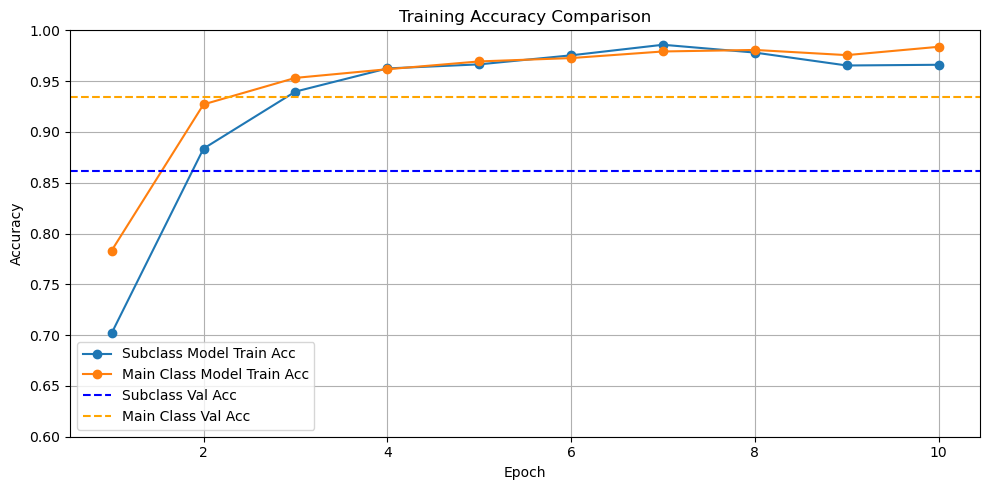

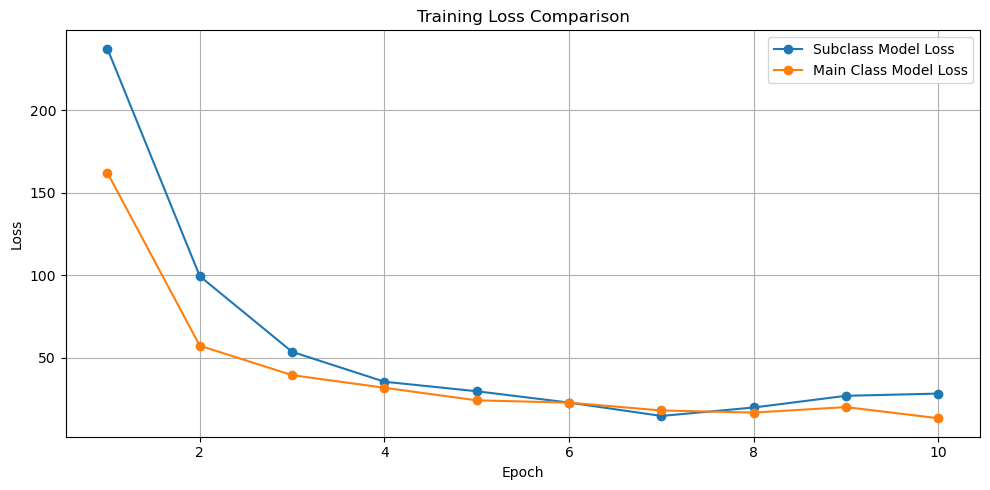

In [9]:
import matplotlib.pyplot as plt

# === Training data for subclass predictor
subclass_epochs = list(range(1, 11))
subclass_acc = [0.7019, 0.8836, 0.9397, 0.9625, 0.9665, 0.9754, 0.9858, 0.9781, 0.9654, 0.9661]
subclass_loss = [237.4018, 99.5351, 53.6762, 35.5542, 29.7706, 22.9027, 14.8081, 19.9303, 27.0267, 28.3649]
subclass_val_acc = 0.8617

# === Training data for main class predictor
main_epochs = list(range(1, 11))
main_acc = [0.7832, 0.9271, 0.9532, 0.9617, 0.9694, 0.9727, 0.9792, 0.9807, 0.9756, 0.9838]
main_loss = [162.1791, 57.3886, 39.5455, 31.8888, 24.2697, 22.8751, 18.1199, 16.8628, 20.1621, 13.4116]
main_val_acc = 0.9344

# === Plot training accuracy
plt.figure(figsize=(10, 5))
plt.plot(subclass_epochs, subclass_acc, label="Subclass Model Train Acc", marker='o')
plt.plot(main_epochs, main_acc, label="Main Class Model Train Acc", marker='o')
plt.axhline(subclass_val_acc, color='blue', linestyle='--', label="Subclass Val Acc")
plt.axhline(main_val_acc, color='orange', linestyle='--', label="Main Class Val Acc")
plt.title("Training Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0.6, 1.0)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# === Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(subclass_epochs, subclass_loss, label="Subclass Model Loss", marker='o')
plt.plot(main_epochs, main_loss, label="Main Class Model Loss", marker='o')
plt.title("Training Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#Enter an image.

In [22]:
import torch
from torchvision import models, transforms
from PIL import Image
import os

def predict_rock_class(model_path, image_path):
    # === Setup
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # === Define the same transform used in training
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

    # === Load the image
    img = Image.open(image_path).convert("RGB")
    img_tensor = transform(img).unsqueeze(0).to(device)  # add batch dim

    # === Load the model (ResNet18 with 7 outputs)
    model = models.resnet18(pretrained=False)
    model.fc = torch.nn.Linear(model.fc.in_features, 7)  # 7 subclasses
    model.load_state_dict(torch.load(model_path, map_location=device))
    model = model.to(device)
    model.eval()

    # === Predict
    with torch.no_grad():
        outputs = model(img_tensor)
        _, predicted = torch.max(outputs, 1)

    # === Class index to label mapping
    class_names = ['Basalt', 'Granite', 'Marble', 'Quartzite', 'Coal', 'Limestone', 'Sandstone']
    prediction = class_names[predicted.item()]
    return prediction


In [ ]:
"C:\Users\kuzey\OneDrive\Masaüstü\cografya_proje\rock_resnet18_mainclass.pth" #mainclass predictor
"C:\Users\kuzey\OneDrive\Masaüstü\cografya_proje\rock_resnet18_subclass.pth" #subclass predictor

In [23]:
predict_rock_class(r"C:\Users\kuzey\OneDrive\Masaüstü\cografya_proje\rock_resnet18_mainclass.pth",r"C:\Users\kuzey\Downloads\2e4d5485-5977-475d-882d-dc5ba53b24eb.jpg")

'Granite'

In [26]:
import torch
from torchvision import models, transforms
from PIL import Image

def classify_both_models(image_path):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # === Model paths
    subclass_model_path = r"C:\Users\kuzey\OneDrive\Masaüstü\cografya_proje\rock_resnet18_subclass.pth"
    mainclass_model_path = r"C:\Users\kuzey\OneDrive\Masaüstü\cografya_proje\rock_resnet18_mainclass.pth"

    subclass_labels = ['Basalt', 'Granite', 'Marble', 'Quartzite', 'Coal', 'Limestone', 'Sandstone']
    main_labels = ['Igneous', 'Metamorphic', 'Sedimentary']

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

    # === Preprocess image
    img = Image.open(image_path).convert("RGB")
    img_tensor = transform(img).unsqueeze(0).to(device)

    # === SUBCLASS MODEL (7 classes)
    model_sub = models.resnet18(pretrained=False)
    model_sub.fc = torch.nn.Linear(model_sub.fc.in_features, 7)
    model_sub.load_state_dict(torch.load(subclass_model_path, map_location=device))
    model_sub.to(device).eval()

    with torch.no_grad():
        out_sub = model_sub(img_tensor)
        probs_sub = torch.softmax(out_sub, dim=1).squeeze().cpu().numpy()

    print("🪨 Subclass Predictions:")
    for label, prob in sorted(zip(subclass_labels, probs_sub), key=lambda x: x[1], reverse=True):
        print(f"  {label}: {prob:.2f}")

    # === MAIN CLASS MODEL (3 classes)
    model_main = models.resnet18(pretrained=False)
    model_main.fc = torch.nn.Linear(model_main.fc.in_features, 3)
    model_main.load_state_dict(torch.load(mainclass_model_path, map_location=device))
    model_main.to(device).eval()

    with torch.no_grad():
        out_main = model_main(img_tensor)
        probs_main = torch.softmax(out_main, dim=1).squeeze().cpu().numpy()

    print("\n🧱 Main Class Predictions:")
    for label, prob in sorted(zip(main_labels, probs_main), key=lambda x: x[1], reverse=True):
        print(f"  {label}: {prob:.2f}")


In [27]:
classify_both_models(r"C:\Users\kuzey\Downloads\b4171af9-8eb4-4fb3-a5e7-0840b460f8cc.jpg")


🪨 Subclass Predictions:
  Coal: 0.90
  Basalt: 0.05
  Sandstone: 0.03
  Quartzite: 0.02
  Limestone: 0.00
  Marble: 0.00
  Granite: 0.00


RuntimeError: Error(s) in loading state_dict for ResNet:
	size mismatch for fc.weight: copying a param with shape torch.Size([7, 512]) from checkpoint, the shape in current model is torch.Size([3, 512]).
	size mismatch for fc.bias: copying a param with shape torch.Size([7]) from checkpoint, the shape in current model is torch.Size([3]).